In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [2]:
dados = pd.read_csv('Data/chapter_1_clean_dataset.csv')
dados

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26659,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,5003,3047,5000,1000,0,high school,0,1,0,0
26660,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8998,129,0,0,0,high school,0,1,0,0
26661,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,22000,4200,2000,3100,1,university,0,0,0,1
26662,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,1178,1926,52964,1804,1,high school,0,1,0,0


In [3]:
X = dados['LIMIT_BAL']
y = dados['default payment next month']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y.values, test_size = 0.2, random_state = 24)

In [5]:
logistic_regressor = LogisticRegression(C=0.1, class_weight=None, dual=False, 
        fit_intercept=True, intercept_scaling=1, max_iter=100, multi_class='auto',
        n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
        tol=0.0001, verbose=0, warm_start=False)

In [6]:
logistic_regressor.fit(X_train, y_train)
y_test_pred_prob = logistic_regressor.predict_proba(X_test)

In [7]:
metrics.roc_auc_score(y_test, y_test_pred_prob[:, 1])

0.6201990844642832

Text(0.5, 1.0, 'Curva ROC para regressor logístico a partir da feature LIMIT_BAL')

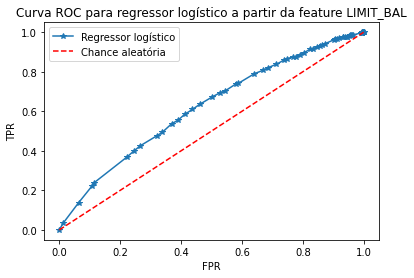

In [8]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_prob[:, 1])

plt.plot(fpr, tpr, '*-')
plt.plot([0,1], [0,1], 'r--')
plt.legend(['Regressor logístico', 'Chance aleatória'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curva ROC para regressor logístico a partir da feature LIMIT_BAL')

Text(0.5, 1.0, 'Precisão e recall para regressor logístico a partir da feature LIMIT_BAL')

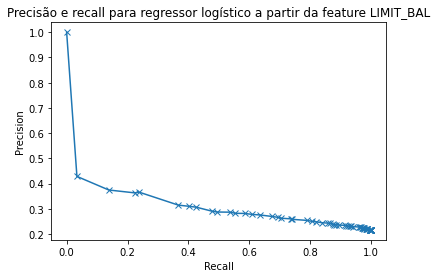

In [9]:
precision, recall, thresh = metrics.precision_recall_curve(y_test, y_test_pred_prob[:, 1])

plt.plot(recall, precision, '-x')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precisão e recall para regressor logístico a partir da feature LIMIT_BAL')

In [10]:
metrics.auc(recall, precision)

0.31566964427378624

In [11]:
y_train_pred_proba = logistic_regressor.predict_proba(X_train)
metrics.roc_auc_score(y_train, y_train_pred_proba[:, 1])

0.6182918113358344